Name: Luigi T. Francisco <br>
Course and Section: CPE32S3<br>
Date of Submission: 03/26/2024<br>
Instructor: Engr. Roman Richard<br>

In this assignment, you are task to build a multilayer perceptron model. The following are the requirements:

* Choose any dataset
* Explain the problem you are trying to solve
* Create your own model
* Evaluate the accuracy of your model


In this activity I have chosen a ISOLET data set

Background: It is a data set with records of letters being spoken twice. 150 people participated generating around 7800 samples but there are samples that were ommited due to difficulty of recording. The Data was already normalized by them since their purpose was also to develop neural networks and it is reported that there are no missing values in the databsae.

The features are described in the paper by Cole and Fanty cited above.  The features include spectral coefficients; contour features, sonorant features, pre-sonorant features, and post-sonorant features.  Exact order of appearance of the features is not known(UCI Machine Learning Repository, n.d.).

UCI Machine Learning Repository. (n.d.). https://archive.ics.uci.edu/dataset/54/isolet

Cole, R. A., & Fanty, M. (1990). Spoken letter recognition. Research Gate. https://doi.org/10.3115/116580.116725

Data Pre-Processing Already Done by them

* Finding Missing Values (UCI Machine Learning Repository, n.d.).
* Normalizing the Data (Cole & Fanty, 1990).


In [1]:
# I've imported some libraries that we already used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Activation

In [2]:
!pip install ucimlrepo # installation of this library so i can import datasets from ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo #function to fecth the data set

# fetch dataset
isolet = fetch_ucirepo(id=54)

# data (as pandas dataframes)
X = isolet.data.features
y = isolet.data.targets

# metadata
print(isolet.metadata)

# variable information
print(isolet.variables)

{'uci_id': 54, 'name': 'ISOLET', 'repository_url': 'https://archive.ics.uci.edu/dataset/54/isolet', 'data_url': 'https://archive.ics.uci.edu/static/public/54/data.csv', 'abstract': ' Goal: Predict which letter-name was spoken--a simple classification task.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 7797, 'num_features': 617, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1991, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.24432/C51G69', 'creators': ['Ron Cole', 'Mark Fanty'], 'intro_paper': {'title': 'Spoken letter recognition', 'authors': 'Fanty, M., Cole, R.', 'published_in': 'Advances in Neural Information Processing Systems 3', 'year': 1991, 'url': None, 'doi': None}, 'additional_info': {'summary': 'This data set was generated as follows. 150 subjects spoke the name of each le

In [4]:
model = Sequential()
X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,test_size=0.3)
X_Train = X_Train.astype('float32')
X_Test = X_Test.astype('float32')

print("Feature matrix:", X_Train.shape)
print("Target matrix:", y_Train.shape)
print("Feature matrix:",X_Test.shape)
print("Target matrix:", y_Test.shape)

Feature matrix: (5457, 617)
Target matrix: (5457, 1)
Feature matrix: (2340, 617)
Target matrix: (2340, 1)


In [5]:
# Form the Input, hidden, and output layers.
#source for my layer activation :https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/
model = Sequential([
	Flatten(input_shape=(617,1)), # i flattened it with 617,1 since its already a dataframe
	# dense layer 1
	Dense(512, activation='relu'), # From the source above it said that the hidden layer when continous should be relu
	# dense layer 2
	Dense(256, activation='relu'),

  Dense(256, activation='relu'),
  Dense(256, activation='relu'),
	# output layer
	Dense(28, activation='softmax'), #Output function should be softmax if the output should be categorical
])

In [6]:
model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy']) # This one is required, Adam


itdxer (https://stats.stackexchange.com/users/64943/itdxer), What is batch size in neural network?, URL (version: 2019-04-05): https://stats.stackexchange.com/q/153535

From this source it seems that the higher that batch_size the more accurate the results would be

In [7]:
history = model.fit(X_Train, y_Train, epochs=10,batch_size=1500, validation_split=0.2)


Epoch 1/10
3/3 [==============================] - 2s 219ms/step - loss: 3.2004 - accuracy: 0.1475 - val_loss: 2.7419 - val_accuracy: 0.3828
Epoch 2/10
3/3 [==============================] - 0s 97ms/step - loss: 2.4436 - accuracy: 0.4213 - val_loss: 1.8002 - val_accuracy: 0.5641
Epoch 3/10
3/3 [==============================] - 0s 117ms/step - loss: 1.4737 - accuracy: 0.6495 - val_loss: 1.0422 - val_accuracy: 0.7555
Epoch 4/10
3/3 [==============================] - 0s 116ms/step - loss: 0.8916 - accuracy: 0.7459 - val_loss: 0.8114 - val_accuracy: 0.7244
Epoch 5/10
3/3 [==============================] - 0s 97ms/step - loss: 0.6877 - accuracy: 0.7540 - val_loss: 0.6439 - val_accuracy: 0.7857
Epoch 6/10
3/3 [==============================] - 0s 116ms/step - loss: 0.5878 - accuracy: 0.8057 - val_loss: 0.5396 - val_accuracy: 0.7766
Epoch 7/10
3/3 [==============================] - 0s 124ms/step - loss: 0.4672 - accuracy: 0.8289 - val_loss: 0.4725 - val_accuracy: 0.8306
Epoch 8/10
3/3 [======

In [8]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

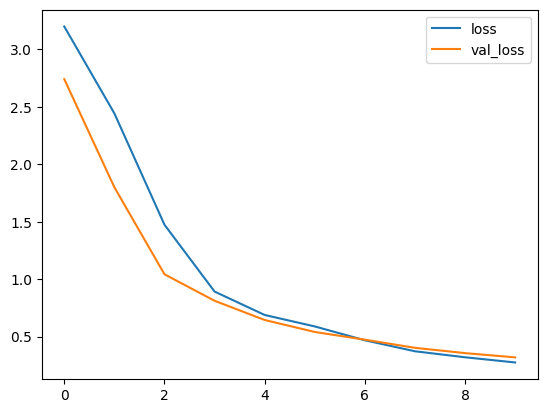

In [9]:
line1 = plt.plot(history.history['loss'],label='loss')
line2 = plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()

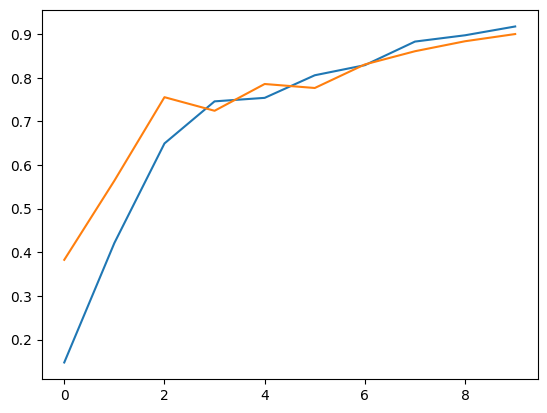

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [11]:
# Find the accuracy of the model

results = model.evaluate(X_Test, y_Test, verbose = 1)
print('test loss, test acc:', results)


74/74 [==============================] - 0s 3ms/step - loss: 0.3091 - accuracy: 0.9064
test loss, test acc: [0.3090783357620239, 0.906410276889801]


Evaluation of The Model:

The Model performed realisticly and accurately with 90% as 70-90% is the industry standard for machine learning models(What Is a Good Accuracy Score in Machine Learning?, 2022). It is also observable that there are no significant drop in accuracy fron when the model is tested against the test data.



Reference:
What is a good accuracy score in Machine Learning? (2022, November 13). Deepchecks. https://deepchecks.com/question/what-is-a-good-accuracy-score-in-machine-learning/


